In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Pumpkin_Seeds_Dataset.csv')

# Display the first few rows of the dataset
data.head()


Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [ ]:
# Splitting data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

X.head(), y.head()


(    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
 0  56276    888.242           326.1485           220.2388        56831   
 1  76631   1068.146           417.1932           234.2289        77280   
 2  71623   1082.987           435.8328           211.0457        72663   
 3  66458    992.051           381.5638           222.5322        67118   
 4  66107    998.146           383.8883           220.4545        67117   
 
    Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
 0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
 1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
 2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
 3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
 4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   
 
    Compactness  
 0       0.8207  
 1       0.7487  
 2       0.6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((2000, 12), (500, 12))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy


0.856

In [ ]:
from sklearn.model_selection import cross_val_score

# Applying 10-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Calculating the mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(0.8859999999999999, 0.02596150997149436)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to be tuned
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True)
best_model = grid_search.fit(X_train_scaled, y_train)

# Best parameters and their corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_params, best_accuracy


({'C': 10, 'kernel': 'rbf'}, 0.8895)

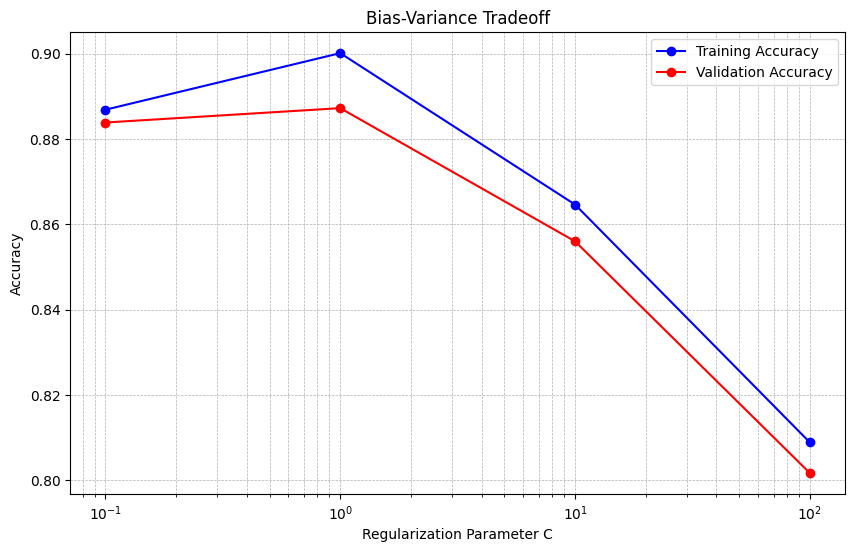

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting training and validation scores from grid search results
train_scores = grid_search.cv_results_['mean_train_score']
validation_scores = grid_search.cv_results_['mean_test_score']

# Number of hyperparameter combinations
num_combinations = len(grid_search.cv_results_['params'])

# Extracting unique values of C for plotting
C_values = np.unique([param['C'] for param in grid_search.cv_results_['params']])

# Averaging training and validation scores for each unique C value
avg_train_scores = [np.mean(train_scores[i::len(C_values)]) for i in range(len(C_values))]
avg_validation_scores = [np.mean(validation_scores[i::len(C_values)]) for i in range(len(C_values))]

# Plotting the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(C_values, avg_train_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(C_values, avg_validation_scores, marker='o', label='Validation Accuracy', color='red')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


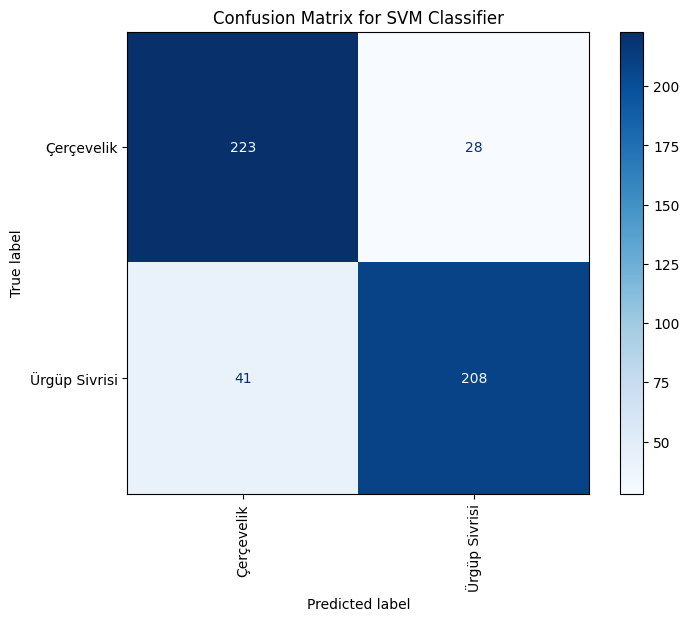

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Using the best estimator from the grid search to predict on the test set
best_svm = grid_search.best_estimator_
y_pred_optimal = best_svm.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# Define labels and classes
class_labels = y.unique()

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')
ax.set_title('Confusion Matrix for SVM Classifier')

plt.show()


## Predicting on the test set

In [ ]:
# Choosing a row from the testing set
row_index = 4
selected_row = X_test_scaled[row_index]

# Predict the target class for the selected row using the trained SVC model
predicted_value = best_model.predict([selected_row])

# Get the actual target value from the testing set
actual_value = y_test.iloc[row_index]

# Compare the predicted value to the actual value
print("Predicted Value:", predicted_value)
print("Actual Value:", actual_value)

Predicted Value: ['Ürgüp Sivrisi']
Actual Value: Ürgüp Sivrisi
